<a href="https://colab.research.google.com/github/Blinova-Olga/intelligent-systems-HW1/blob/main/Pandas%26DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


In [3]:
nt = pd.read_table('chipotle.tsv')
df = pd.DataFrame(nt)

Необходимо преобразовать данные отделить позиции содержащие "and". \
Так как придется пересчитывать цены для второй позиции, преобразуем цены в числовые переменные **(задание 5)**

In [4]:
df['item_price'] = df['item_price'].apply(lambda x: x.replace('$', ''))
df = df.astype({"item_price": float})

In [ ]:
df.head(20)

In [ ]:
#проверка типа
df.dtypes

Преобразование позиций с "and"

In [7]:
rows_with_and = df[df['item_name'].str.contains(' and ')]
for index, row in rows_with_and.iterrows():
  str2 = df.loc[index,'item_name']
  l = str2.split(" and ")
  price = df.loc[df['item_name'] == l[0]]['item_price'].iloc[0]
  df.loc[index,'item_name'] = l[0]
  df.loc[index,'item_price'] = price
  df.loc[len(df)]=row.copy()
  df.at[df.index[-1],'item_name']=l[1]
  df.at[df.index[-1],'item_price']=row.item_price - price

In [ ]:
#сортировка по заказам
df = df.sort_values('order_id')
df.reset_index(drop=True)

**Решение 1 задания** (кол-во наблюдений)

In [9]:
print('Row count is:',df.shape[0])

Row count is: 5394


**Решение 2 задания** (название столбцов)

In [10]:
print(list(df.columns))

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


**Решение 3 задания** (самая частая позиция)


In [11]:
print(*df.item_name.mode())

Chips


**Решение 4 задания** (гистрограмма частоты заказов)

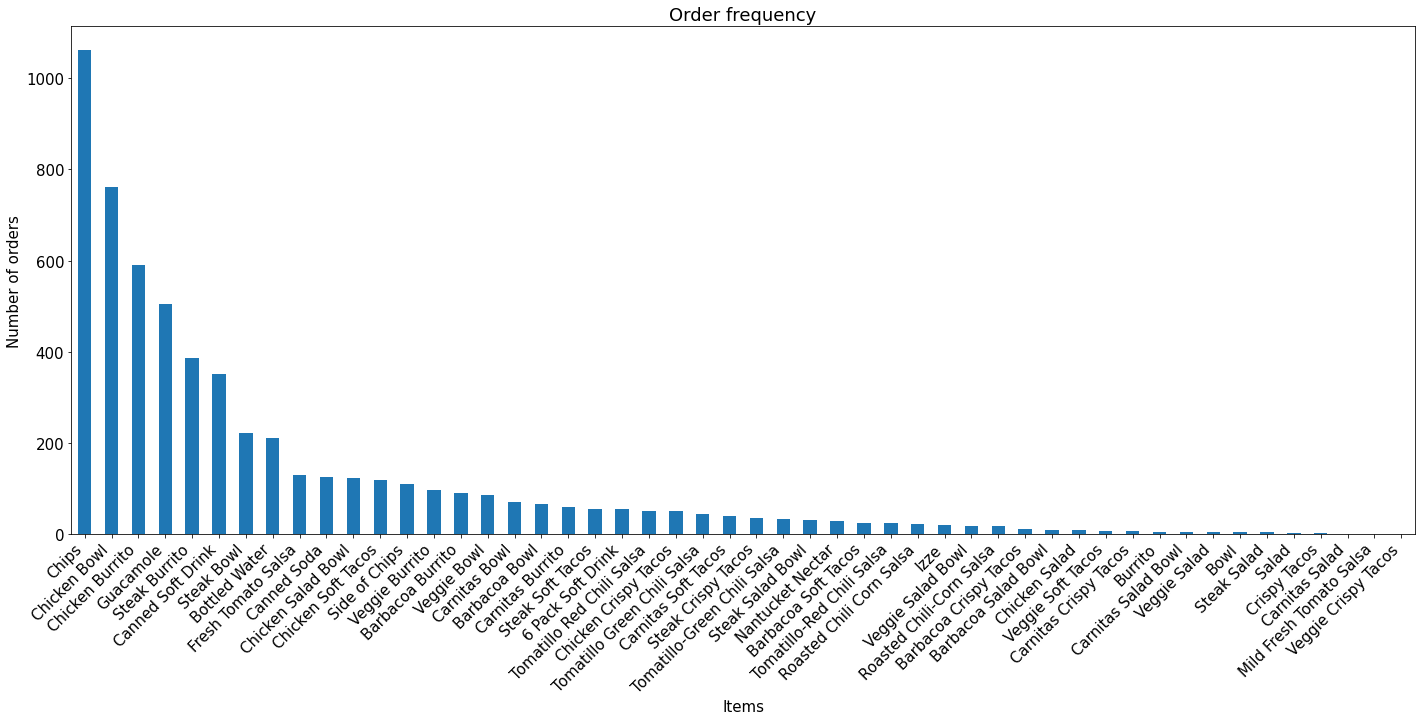

In [24]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 15    #шрифт
group = df.groupby('item_name').quantity.sum().sort_values(ascending=False)  
chart = group.plot(x='item_name', y="quantity", kind="bar", legend=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
chart.set(xlabel="Items", ylabel = "Number of orders")
plt.tight_layout()
plt.title('Order frequency')
plt.show()

**Решение задания 6** ( Гистрограмма кол-во денег заработанных по каждой позиции)

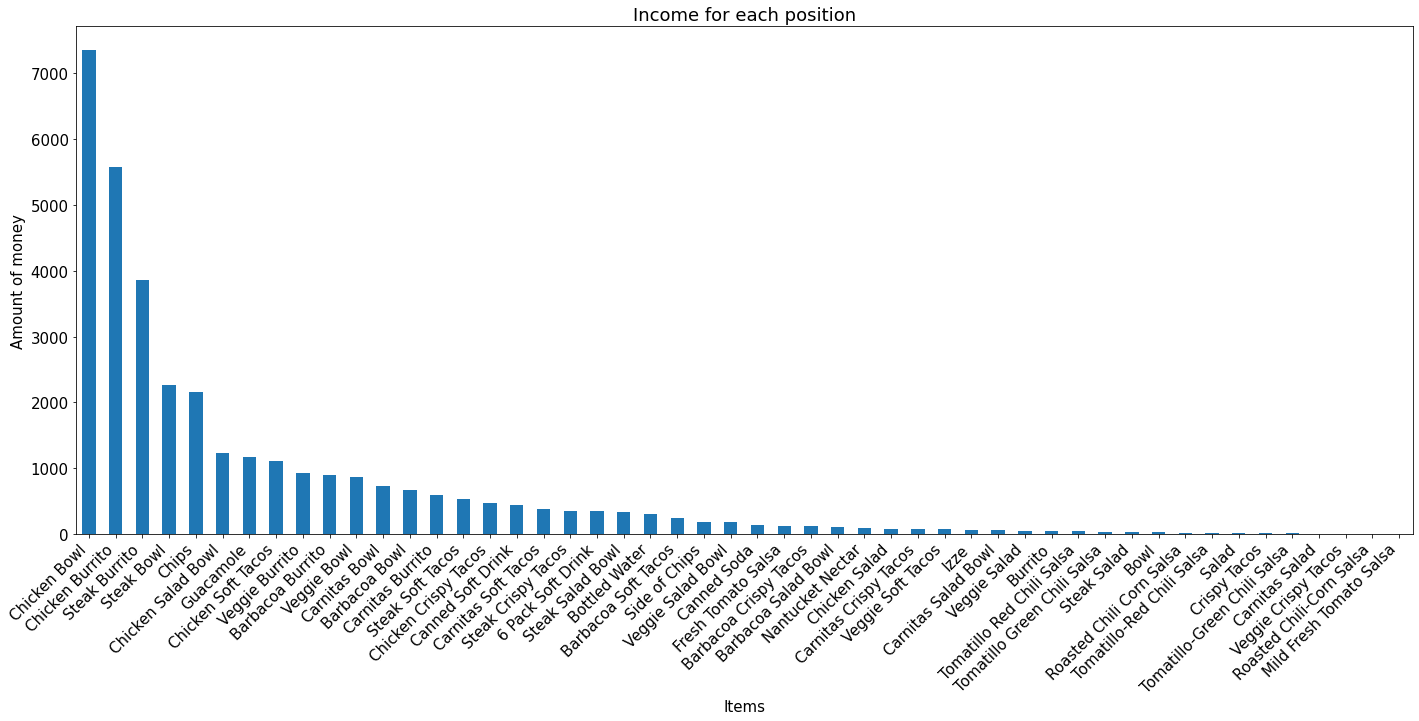

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 15    #шрифт
group = df.groupby('item_name').item_price.sum().sort_values(ascending=False)
chart = group.plot(x='item_name', y="item_price", kind="bar", legend=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
chart.set(xlabel="Items", ylabel = "Amount of money")
plt.tight_layout()
plt.title('Income for each position')
plt.show()

**Решение задания 7** (Средняя сумма заказа)

In [34]:
price = df.groupby('order_id').item_price.sum().mean()
price = float('{:.2f}'.format(price))
print('Mean order amount:', price,"$")


Mean order amount: 18.81 $


In [35]:
price = df['item_price'].sum() / df['order_id'].max()
price = float('{:.2f}'.format(price))
print('Mean order amount:', price,"$")

Mean order amount: 18.81 $


**Решение задания 8** (среднее, минимальное и максимальное, медианное значения позиций в заказе)

In [39]:
it_mid=df.groupby('order_id').quantity.mean()


In [ ]:
items = df.groupby('item_name').quantity.sum()
print(items)

In [ ]:
with_and = df[df['item_name'].str.contains(' and ')]
with_and.item_price

In [ ]:
df.groupby('item_name').quantity.sum()

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.